# Iris Species Classification 

### Group 126: Manya Jain, Zhuohang Lyu, Chang Sun

# Introduction

Iris is a genus of flowering plants with 310 recognised species with vivid flowers. Iris is both the common name and the scientific name for all species of Iris, as well as some species from other closely related genera.

### Question:
We shall answer the following question: Can we distinguish among the species of the iris plant?

### Dataset Used:
The dataset that we will be using for the analysis is a multivariable dataset, “Iris flower dataset”, also known as “Fisher’s Iris data set”. The Iris dataset, which is also available on the UCI Machine Learning Repository, was utilised in R.A. Fisher's 1936 landmark paper ‘The Use of Multiple Measurements in Taxonomic Problems’.

These are the columns in this dataset: 
 - Id = Number of observation.
 - SepalLengthCm = Length of sepal of iris species in centimeters.
 - SepalWidthCm = Weidth of sepal of iris species in centimeters.
 - PetalLengthCm = Length of petal of iris species in centimeters.
 - PetalWidthCm = Width of petal of iris species in centimeters.
 - Species = Name of the species (Iris setosa, Iris virginica or Iris versicolor)the observation belongs to. 
 
We intend to perform classification by stratifying the dataset by species.

The predictors we will be using are: SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm. 

We will visualize using scatter plot: In order to investigate the relationship between individual predictors based on iris species, scatterplot may be a better choice because the scatterplot is a type of data display that demonstrates the connection between two numerical variables.



# Methods And Results:

### Loading The Packages
Firstly, we will load the required packages in R to gain access to useful functions for performing the data analysis.

In [1]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Reading The Dataset

Then, we load the dataset from the link "https://raw.githubusercontent.com/SunChang666/dsci126/main/Iris.csv" in GITHUB by using the read_delim function.

To get this into R using the read_delim function, we specify the first argument as the path to the file, and then provide values to the delim argument (here a comma which we represent by ",") and the col_names argument. read_csv, read_tsv and read_delim have a col_names argument and the default is TRUE.

We will name our dataset iris. 

In [2]:
url = "https://raw.githubusercontent.com/SunChang666/dsci126/main/Iris.csv"
iris <- read_delim(url,
                  delim=",",
                  col_names=TRUE)
iris

Rows: 150 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (5): Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


### Cleaning the dataset

Now we are trying to make the original data tidy because there are something useless or incorrect in the dataset. We first convert the "Species" column from character to factor by using the `mutate` function. Moreover, we need to remove the "Id" column since the "Id" column is not useful for our following process, which we will accomplish using the select function.

In [3]:
iris_tidy <- iris|>
             mutate(Species = as.factor(Species))|>
             select(!Id)
iris_tidy

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


### Describing the variables
Factors have “levels,” which are though of as categories. We can verify the levels of the Species column by using the levels function, which should return the name of each category in that column. 

In [4]:
iris_tidy |> 
          pull(Species) |>
          levels()

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

### Exploring the iris data
Below we use the group_by, summarize and n functions to find the number and percentage of each species of observations in our data set. 

In [5]:
num_obs <- nrow(iris_tidy)
           iris_tidy |>
           group_by(Species) |>
           summarize(count = n(),
                     percentage = n() / num_obs * 100)

Species,count,percentage
<fct>,<int>,<dbl>
Iris-setosa,50,33.33333
Iris-versicolor,50,33.33333
Iris-virginica,50,33.33333


We have 50 observations (33.33%) of each of the iris three iris species (Iris setosa, Iris virginica and Iris versicolor).

### Splitting the data into a training and test set

According to the golden rule of machine learning, we should always split the dataset into training data and testing data and only use the training data to create the classifier. The testing data will be used as the "test" to evaluate the accuracy of this classifier. We will set `seed 200` here to make our prediction randomly and reproducible. We use 80 percent data of the oringinal dataset by using `prop=0.8`.

In [6]:
set.seed(200)
iris_split <- initial_split(iris_tidy, prop= 0.8, strata = Species)
iris_train <- training(iris_split)
iris_test <- testing(iris_split)

iris_split

<Training/Testing/Total>
<120/30/150>

At this point, we have calculated the required statistics based on the data input into the recipe, but the data are not yet scaled and centered.

### Preprocessing The Data (Centering and Scaling)

As K-nearest neighbors is sensitive to the scale of the predictors, we will preprocess the data to standardize it. We will add scaling (step_scale) and centering (step_center) steps for all of the predictors so that they each have a mean of 0 and standard deviation of 1.

Below, we set `seed 300` and construct the recipe with training data and scaling all of the training data.

In [7]:
set.seed(300)

iris_recipe <- recipe(Species ~., data = iris_train) %>%
               step_scale(all_predictors()) %>%
               step_center(all_predictors())
iris_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### Training the classifier

Since we still have no idea of the value of neighbors, we write tune in neighbors to find the best value of k.

In [8]:
set.seed(300)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
            set_engine("kknn")|>
            set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### Perform Cross Validation 

We will perform the 5-fold-cross-validation method below.

In [9]:
set.seed(300)

iris_vfold <- vfold_cv(iris_train, v = 5, strata = Species)

#### Creata a Tibble To Classify

We create a tibble that includes the sequence from 1 to 91 below.

In [10]:
gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 5))
gridvals

neighbors
<dbl>
1
6
11
16
21
26


#### Add Everything In A Workflow

We need to create a model specification, combine the model specification and recipe into a workflow, and then use `tune_grid` with resamples `iris vfold` and `tibble gridvals`.

In [11]:
set.seed(300)

iris_results <- workflow()|>
                add_recipe(iris_recipe)|>
                add_model(knn_spec)|>
                tune_grid(resamples = iris_vfold, grid = gridvals)|>
                collect_metrics()
iris_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9333333,5,0.016666667,Preprocessor1_Model1
1,roc_auc,hand_till,0.9500000,5,0.012500000,Preprocessor1_Model1
6,accuracy,multiclass,0.9333333,5,0.038640077,Preprocessor1_Model2
6,roc_auc,hand_till,0.9914062,5,0.006479091,Preprocessor1_Model2
11,accuracy,multiclass,0.9583333,5,0.013176157,Preprocessor1_Model3
11,roc_auc,hand_till,0.9937500,5,0.005049667,Preprocessor1_Model3
16,accuracy,multiclass,0.9333333,5,0.016666667,Preprocessor1_Model4
16,roc_auc,hand_till,0.9927083,5,0.007291667,Preprocessor1_Model4
21,accuracy,multiclass,0.9166667,5,0.022821773,Preprocessor1_Model5


In [12]:
#description

#### Predict The Accuracy

Below we predict the accuracy of our result. Firstly, we will filter our the observations from iris_results where .metric accuracy.

In [13]:
accuracies <- iris_results |>
              filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9333333,5,0.01666667,Preprocessor1_Model1
6,accuracy,multiclass,0.9333333,5,0.03864008,Preprocessor1_Model2
11,accuracy,multiclass,0.9583333,5,0.01317616,Preprocessor1_Model3
16,accuracy,multiclass,0.9333333,5,0.01666667,Preprocessor1_Model4
21,accuracy,multiclass,0.9166667,5,0.02282177,Preprocessor1_Model5
26,accuracy,multiclass,0.9250000,5,0.01559024,Preprocessor1_Model6


We can decide which number of neighbors is best by plotting the accuracy versus K, as shown in Figure 3.

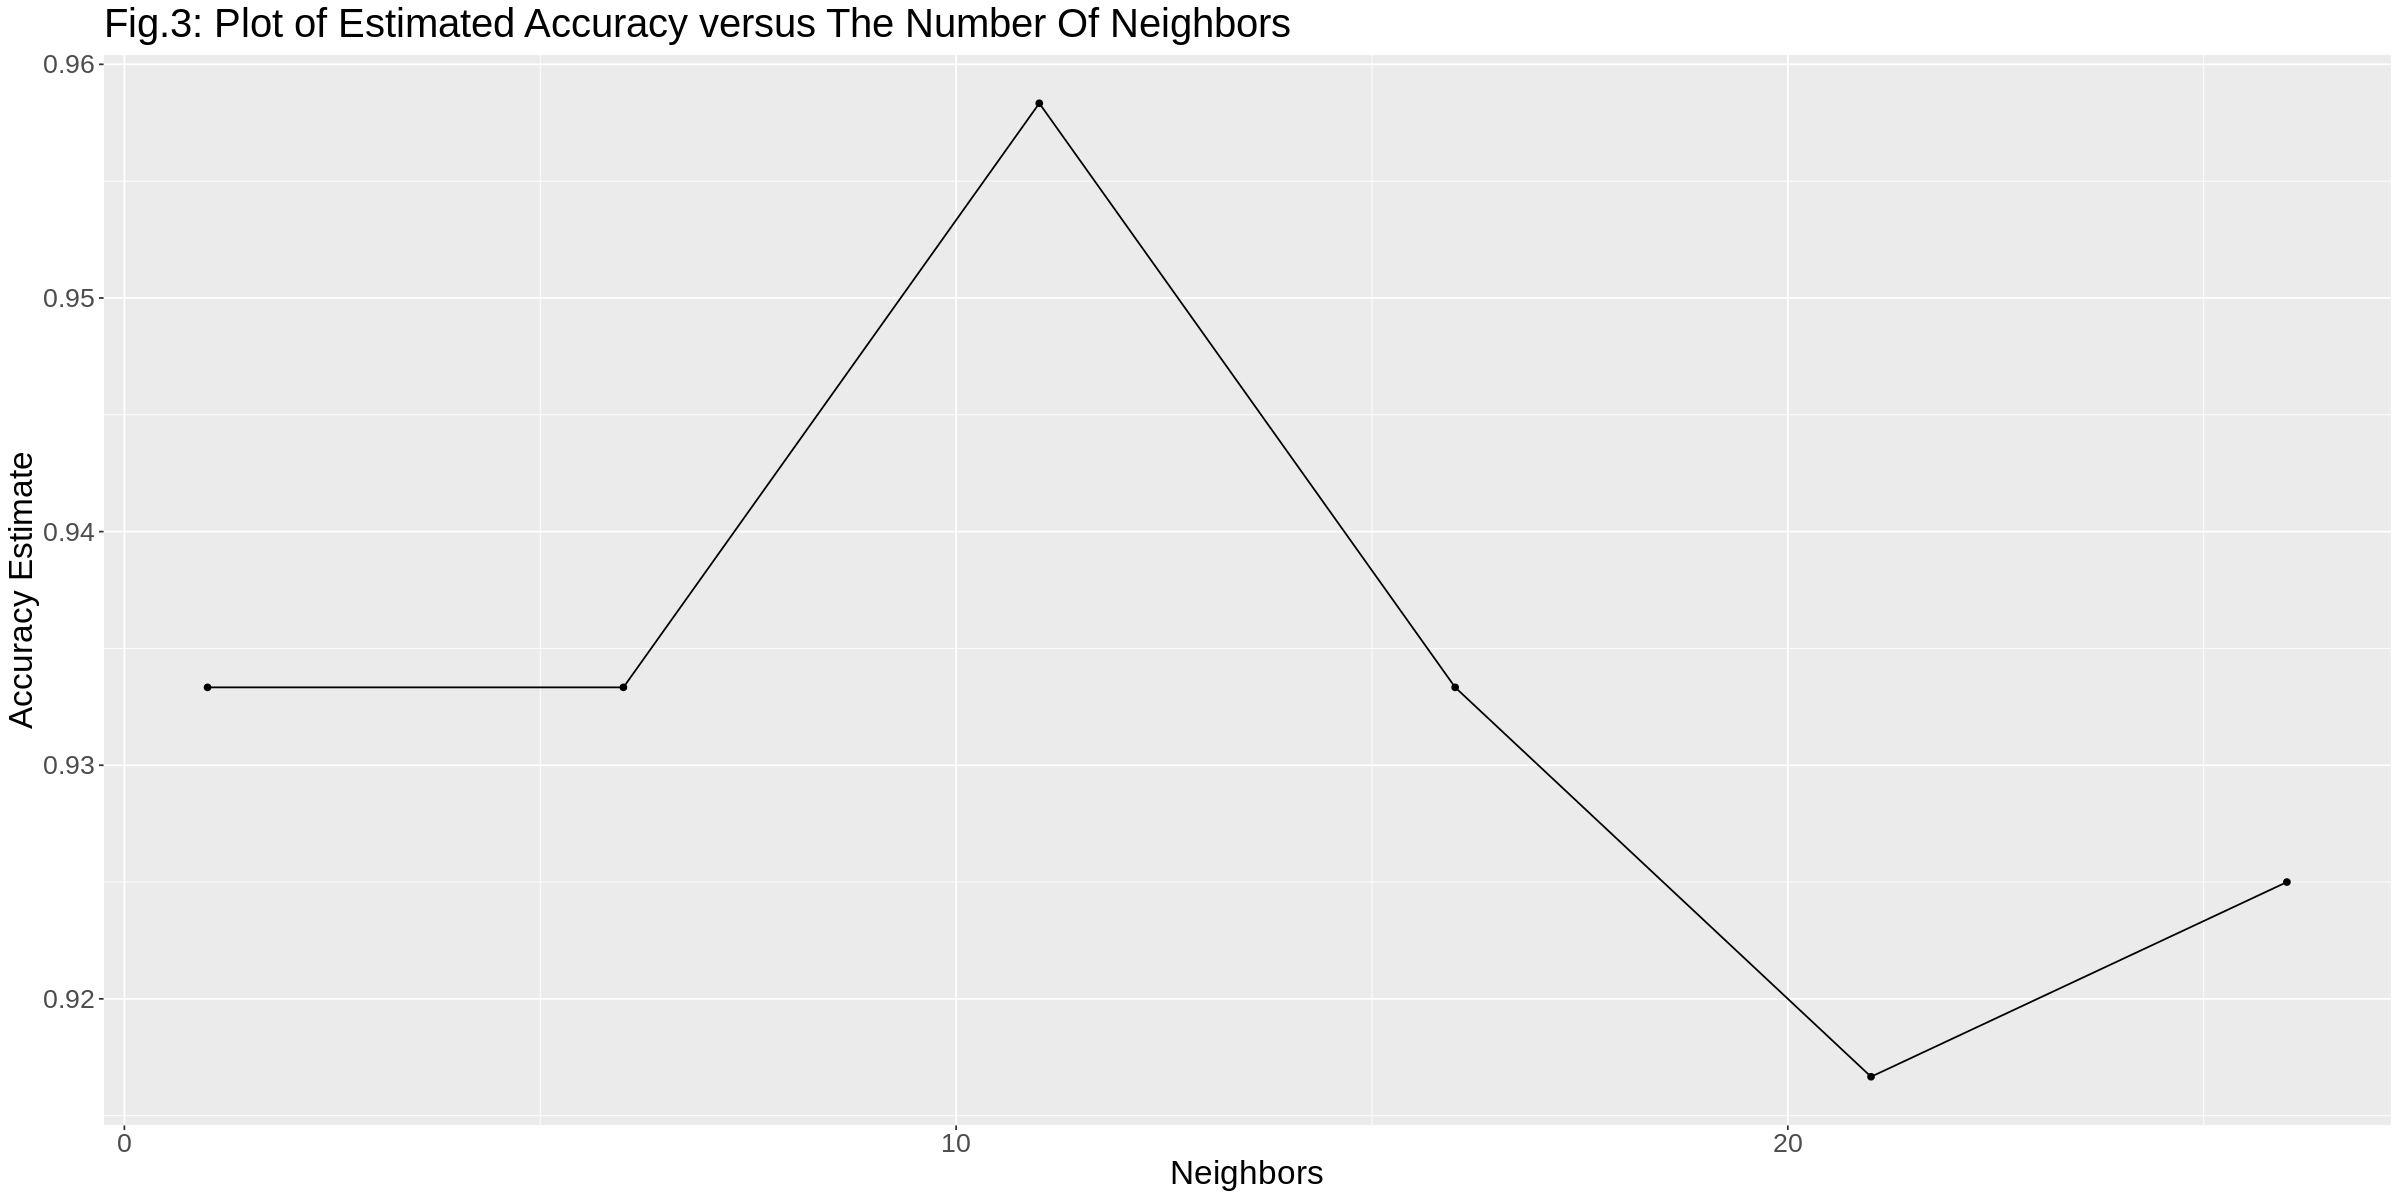

In [14]:
options(repr.plot.width = 20, repr.plot.height = 10)

iris_val_plot <- accuracies |>
                 ggplot(aes(x = neighbors,y=mean)) +
                 geom_line() +
                 geom_point() +
                 labs(x = "Neighbors", y = "Accuracy Estimate") +
                 ggtitle("Fig.3: Plot of Estimated Accuracy versus The Number Of Neighbors") +
                 theme(text = element_text(size = 20))
iris_val_plot

According to the graph above, there is no exact or perfect answer, but we choose 10 as the value of K because:
1. We get roughly optimal accuracy.
2. Changing the value to a nearby one doesn’t change accuracy too much, so that our choice is reliable in the presence of uncertainty.
3. K = 10 does not create a prohibitively expensive computational cost of training.

Now we will perform our knn classification, using the value of K = 10.

In [15]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
                 set_engine("kknn")|>
                 set_mode("classification")

iris_fit <- workflow() |>
            add_recipe(iris_recipe)|>
            add_model(knn_best_spec)|>
            fit(data=iris_train)
knn_best_spec
iris_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 10
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03333333
Best kernel: rectangular
Best k: 10

In [16]:
iris_predictions <- predict(iris_fit,iris_test) |>
                    bind_cols(iris_test)
iris_predictions

.pred_class,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Iris-setosa,4.9,3.0,1.4,0.2,Iris-setosa
Iris-setosa,4.4,2.9,1.4,0.2,Iris-setosa
Iris-setosa,4.9,3.1,1.5,0.1,Iris-setosa
Iris-setosa,4.8,3.4,1.6,0.2,Iris-setosa
Iris-setosa,4.8,3.0,1.4,0.1,Iris-setosa
Iris-setosa,5.7,4.4,1.5,0.4,Iris-setosa
Iris-setosa,5.4,3.4,1.7,0.2,Iris-setosa
Iris-setosa,4.8,3.4,1.9,0.2,Iris-setosa
Iris-setosa,5.4,3.4,1.5,0.4,Iris-setosa


In [17]:
iris_accuracy<-iris_predictions|>
metrics(truth= Species,estimate=.pred_class)|>
select(.metric,.estimate)|>
head(1)
iris_accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


In [18]:
iris_cm <- iris_predictions |>
           conf_mat(truth = Species,estimate=.pred_class)
iris_cm

                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

However, according to the visualizations of the dataset below, we find out that the species may have a stronger relationship to "Petal" part. Thus, we want to figure out the different accuracies by using only the "Sepal" part variables and the "Petal" part variables.

In [19]:
#adding the visulaizations

### Dataset Visualisation
Now we will visualise our data using scatterplots.
First, we will try to establish if there is a relationship among the dimensions of sepals of the three species using a scatterplot, naming the plot sepal_plot.

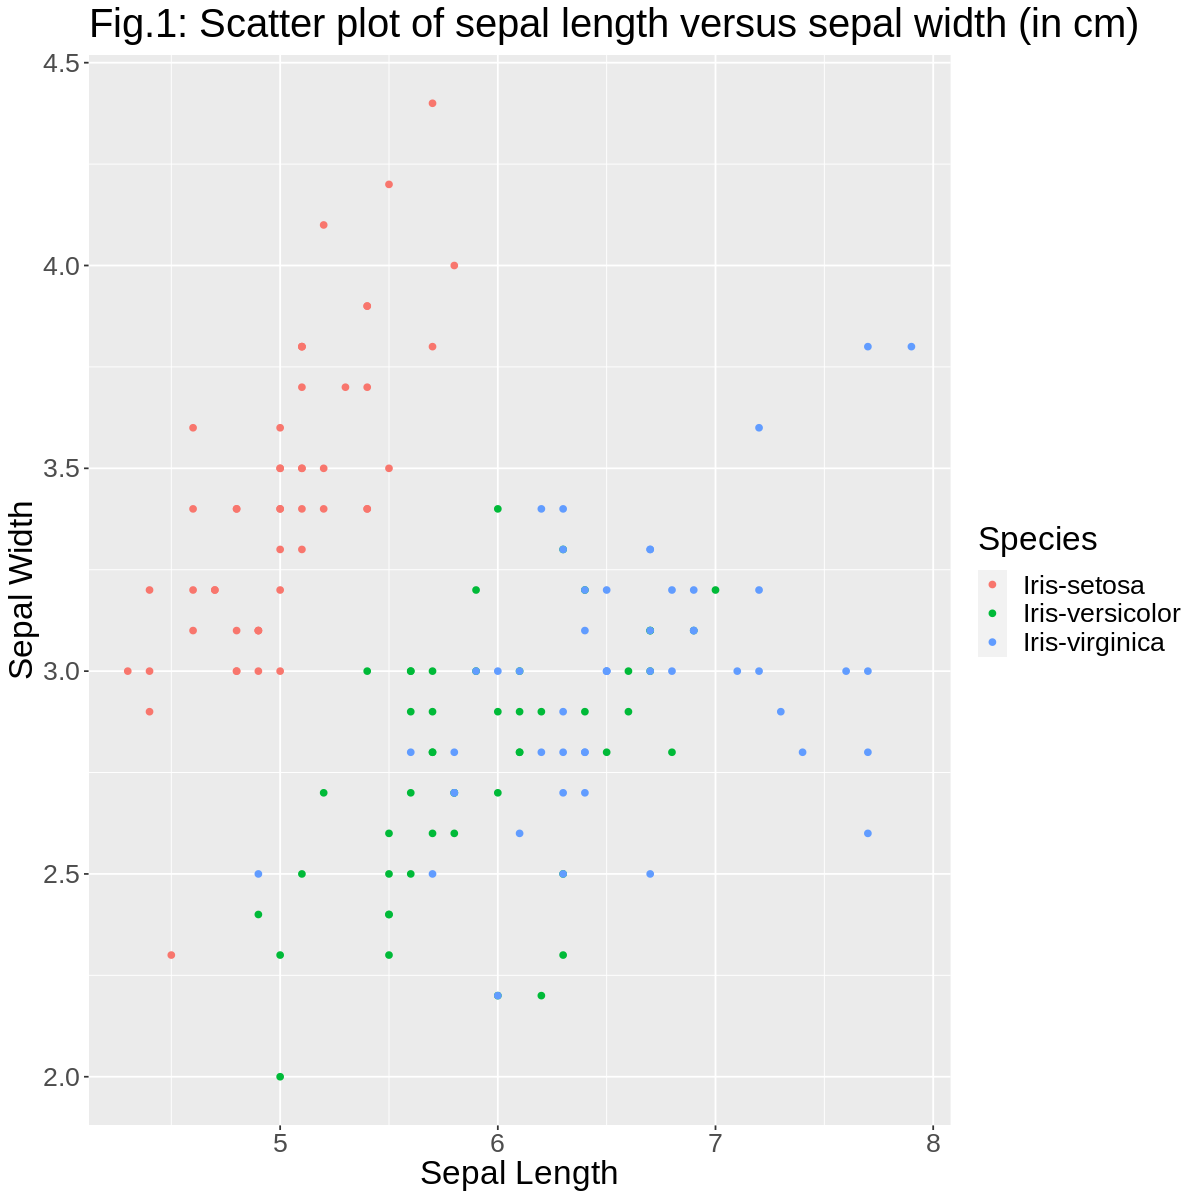

In [20]:
options(repr.plot.width=10 , repr.plot.height= 10)

sepal_plot <- iris_tidy |>
              ggplot(aes(x = SepalLengthCm, y= SepalWidthCm, color=Species)) +
              geom_point() +
              ggtitle("Fig.1: Scatter plot of sepal length versus sepal width (in cm)") +
              labs(x = "Sepal Length", y = "Sepal Width") +
              theme(text=element_text(size=20))
sepal_plot

In figure 1, the plot relates the dimensions of the sepals (length and width) of the three species of flower iris. We can conclude that there is a positive relationship between the sepal length and sepal width for all three species. But the relationship is weaker for Iris-versicolor and Iris-virginica than for Iris-setosa.

We can also conclude that sepal dimensions are almost similar for Iris-versicolor and Iris-virginica.

We will now repeat the same process for petals.

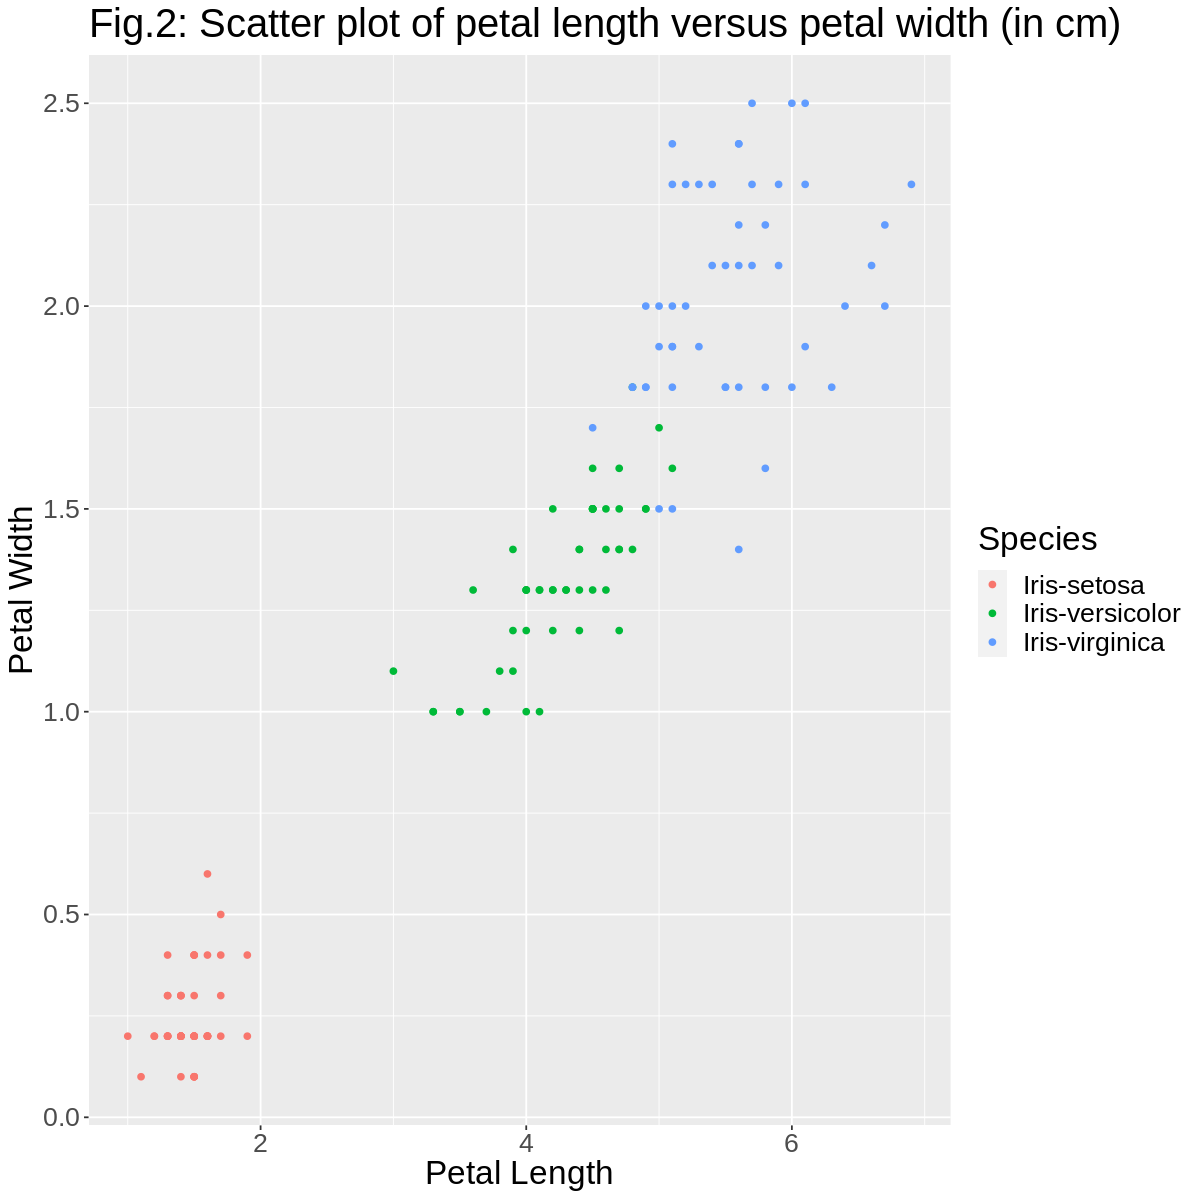

In [21]:
options(repr.plot.width=10 , repr.plot.height= 10)

petal_plot <- iris_tidy |>
              ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = Species)) +
              geom_point() +
              ggtitle("Fig.2: Scatter plot of petal length versus petal width (in cm)") +
              labs(x = "Petal Length", y = "Petal Width") +
              theme(text=element_text(size=20))
petal_plot

From figure 2, we establish a positive corelation between the petal dimensions. In addition, the dimensions are largest in Iris-virginia, then Iris-versicolor, and smallest in Iris-setosa.

##### We would like to split the data to "Sepal" and "Petal" into two different parts. 

For the `Sepal` part, we will be repeating the process that we have done above for the whole dataset.

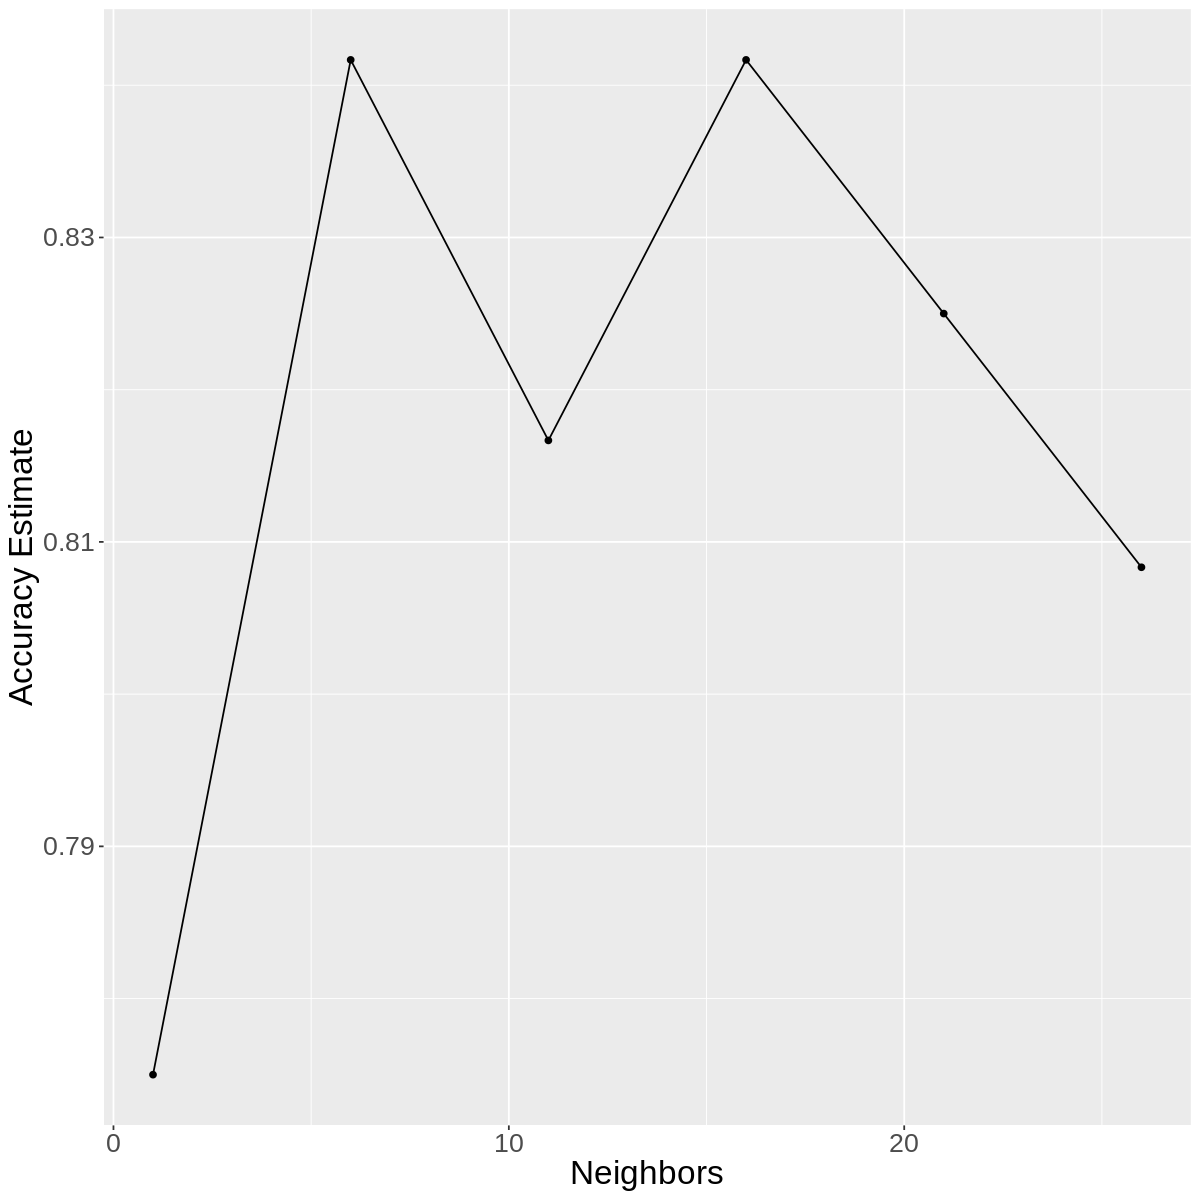

In [22]:
iris_sepal <- select(iris_tidy,SepalLengthCm,SepalWidthCm,Species)

set.seed(200)
iris_split_sepal <- initial_split(iris_sepal, prop = 0.8, strata = Species)
iris_train_sepal <- training(iris_split_sepal)
iris_test_sepal <- testing(iris_split_sepal)

set.seed(300)
iris_recipe_sepal <- recipe(Species ~., data = iris_train_sepal) |>
                     step_scale(all_predictors()) |>
                     step_center(all_predictors())

iris_vfold_sepal <- vfold_cv(iris_train_sepal, v = 5, strata = Species)

iris_results_sepal <- workflow() |>
                      add_recipe(iris_recipe_sepal) |>
                      add_model(knn_spec) |>
                      tune_grid(resamples = iris_vfold_sepal, grid = gridvals) |>
                      collect_metrics()
 
accuracies_sepal <- iris_results_sepal |>
                    filter(.metric == "accuracy")

options(repr.plot.width = 10, repr.plot.height = 10)

iris_val_plot_sepal <- accuracies_sepal |>
                       ggplot(aes(x = neighbors, y = mean)) +
                       geom_line() +
                       geom_point() +
                       labs(x = "Neighbors", y = "Accuracy Estimate") +
                       theme(text = element_text(size = 20))
iris_val_plot_sepal

According to the graph above, we choose 14 as the value of neighbors.

In [23]:


knn_best_spec_sepal <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
                       set_engine("kknn")|>
                       set_mode("classification")

iris_fit_sepal <- workflow() |>
                  add_recipe(iris_recipe_sepal) |>
                  add_model(knn_best_spec_sepal) |>
                  fit(data = iris_train_sepal)

iris_predictions_sepal <- predict(iris_fit_sepal,iris_test_sepal) |>
                          bind_cols(iris_test_sepal)
iris_predictions_sepal

iris_accuracy_sepal <- iris_predictions_sepal |>
                       metrics(truth = Species, estimate = .pred_class) |>
                       select(.metric,.estimate) |>
                       head(1)
iris_accuracy_sepal

iris_cm_sepal <- iris_predictions_sepal |>
                 conf_mat(truth = Species,estimate=.pred_class)
iris_cm_sepal

.pred_class,SepalLengthCm,SepalWidthCm,Species
<fct>,<dbl>,<dbl>,<fct>
Iris-setosa,4.9,3.0,Iris-setosa
Iris-setosa,4.4,2.9,Iris-setosa
Iris-setosa,4.9,3.1,Iris-setosa
Iris-setosa,4.8,3.4,Iris-setosa
Iris-setosa,4.8,3.0,Iris-setosa
Iris-setosa,5.7,4.4,Iris-setosa
Iris-setosa,5.4,3.4,Iris-setosa
Iris-setosa,4.8,3.4,Iris-setosa
Iris-setosa,5.4,3.4,Iris-setosa


.metric,.estimate
<chr>,<dbl>
accuracy,0.7


                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               4              3
  Iris-virginica            0               6              7

For the `Petal` part, by repeating the process we have done above for the whole dataset.

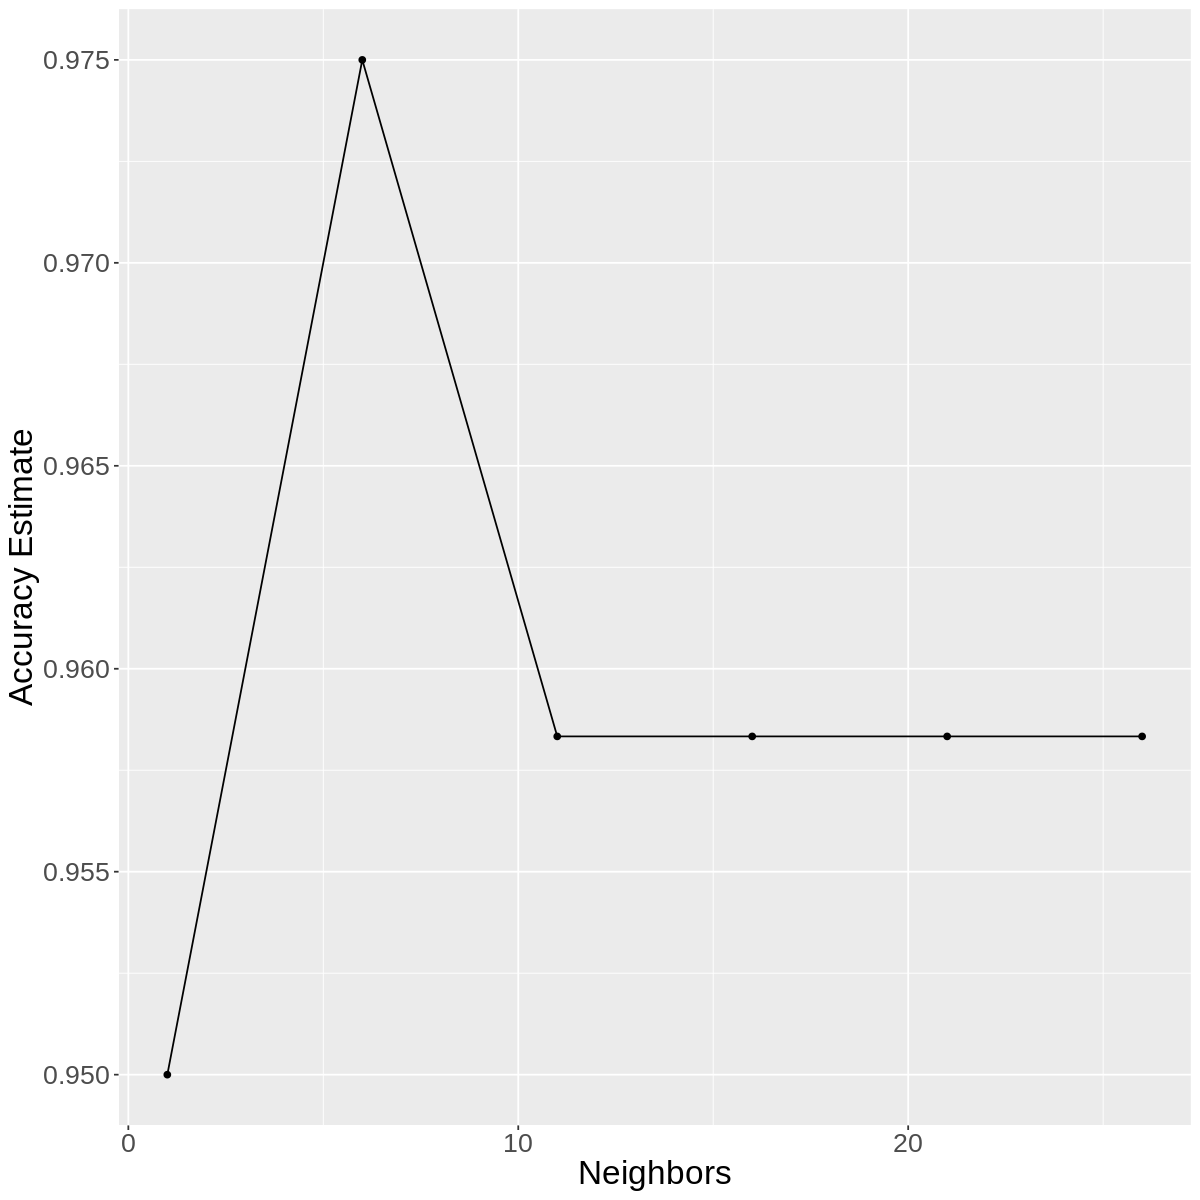

In [24]:
iris_petal <- select(iris_tidy,PetalLengthCm,PetalWidthCm,Species)

set.seed(200)
iris_split_petal <- initial_split(iris_petal, prop = 0.8, strata = Species)
iris_train_petal <- training(iris_split_petal)
iris_test_petal <- testing(iris_split_petal)

set.seed(300)
iris_recipe_petal <- recipe(Species ~., data = iris_train_petal) %>%
                     step_scale(all_predictors()) %>%
                     step_center(all_predictors())

iris_vfold_petal <- vfold_cv(iris_train_petal, v = 5, strata = Species)

iris_results_petal <- workflow() |>
                      add_recipe(iris_recipe_petal) |>
                      add_model(knn_spec) |>
                      tune_grid(resamples = iris_vfold_petal, grid=gridvals) |>
                      collect_metrics()

accuracies_petal <- iris_results_petal |>
                    filter(.metric == "accuracy")

options(repr.plot.width = 10, repr.plot.height = 10)

iris_val_plot_petal <- accuracies_petal |>
                       ggplot(aes(x = neighbors, y = mean)) +
                       geom_line() +
                       geom_point() +
                       labs(x = "Neighbors", y = "Accuracy Estimate") +
                       theme(text = element_text(size = 20))
iris_val_plot_petal

We choose 15 as the value of k-neighbors.

In [25]:

knn_best_spec_petal<-nearest_neighbor(weight_func = "rectangular", neighbors = 15)|>
set_engine("kknn")|>
set_mode("classification")

iris_fit_petal<-workflow()|>
add_recipe(iris_recipe_petal)|>
add_model(knn_best_spec_petal)|>
fit(data=iris_train_petal)

iris_predictions_petal<- predict(iris_fit_petal,iris_test_petal)|>
bind_cols(iris_test_petal)
iris_predictions_petal

iris_accuracy_petal<-iris_predictions_petal|>
metrics(truth= Species,estimate=.pred_class)|>
select(.metric,.estimate)|>
head(1)
iris_accuracy_petal

iris_cm_petal<-iris_predictions_petal|>
conf_mat(truth = Species,estimate=.pred_class)
iris_cm_petal

.pred_class,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<fct>
Iris-setosa,1.4,0.2,Iris-setosa
Iris-setosa,1.4,0.2,Iris-setosa
Iris-setosa,1.5,0.1,Iris-setosa
Iris-setosa,1.6,0.2,Iris-setosa
Iris-setosa,1.4,0.1,Iris-setosa
Iris-setosa,1.5,0.4,Iris-setosa
Iris-setosa,1.7,0.2,Iris-setosa
Iris-setosa,1.9,0.2,Iris-setosa
Iris-setosa,1.5,0.4,Iris-setosa


.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

By putting together the three accuracies, we can find out that the petal part and overall data has a much higher accuracy than the sepal variable.

In [26]:
iris_accuracy
iris_accuracy_sepal
iris_accuracy_petal

.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


.metric,.estimate
<chr>,<dbl>
accuracy,0.7


.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


# Expected outcomes and significance:

In this project we expect to be able to identify the species of iris by the shape of its sepals and petals (length and width). Based on this data, more species of iris can be identified, which may facilitate the selecting and breeding of better varieties.